## An odd potential

So far, the perturbing potentials we have applied have had even symmetry: here we will look at a simple potential with odd symmetry.  This is useful to illustrate more features of perturbation theory, and also to help you think about more aspects of quantum mechanics.  

We start, as usual, with the basis set, integration routines, and then define a potential.

In [1]:
# Import libraries and set up in-line plotting.
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np
# This is a new library - linear algebra includes solving for eigenvalues & eigenvectors of matrices
import numpy.linalg as la

# Define the eigenbasis - normalisation needed elsewhere
def square_well_eigenfunctions(n,width,norm,x):
    """The eigenbasis for a square well, running from 0 to a, sin(n pi x/a)"""
    fac = np.pi*n/width
    return norm*np.sin(fac*x)

# We will also define the second derivative for kinetic energy (KE)
def second_derivative_square_well_eigenfunctions(n,width,norm,x):
    """The eigenbasis for a square well, running from 0 to a, sin(n pi x/a)"""
    fac = np.pi*n/width
    return -fac*fac*norm*np.sin(fac*x)

# Define the x-axis
width = 1.0
num_x_points = 101
x = np.linspace(0.0,width,num_x_points)
dx = width/(num_x_points - 1)

# Integrate the product of two functions over the width of the well
# NB this is a VERY simple integration routine: there are much better ways
def integrate_functions(function1,function2,dx):
    """Integrate the product of two functions over defined x range with spacing dx"""
    # We use the NumPy dot function here instead of iterating over array elements
    integral = dx*np.dot(function1,function2)
    return integral

# Now set up the array of basis functions - specify the size of the basis
num_basis = 10
# These arrays will each hold an array of functions
basis_functions_array = np.zeros((num_basis,num_x_points))
second_derivative_functions_array = np.zeros((num_basis,num_x_points))

# Loop over first num_basis basis states, normalise and create an array
# NB the basis_functions_array will start from 0
for i in range(num_basis):
    n = i+1
    # Calculate A = <phi_n|phi_n>
    integral = integrate_functions(square_well_eigenfunctions(n,width,1.0,x),square_well_eigenfunctions(n,width,1.0,x),dx)
    # Use 1/sqrt{A} as normalisation constant
    normalisation = 1.0/np.sqrt(integral)
    basis_functions_array[i,:] = square_well_eigenfunctions(n,width,normalisation,x)
    second_derivative_functions_array[i,:] = second_derivative_square_well_eigenfunctions(n,width,normalisation,x)
    
# Define a function to act on a basis function with the potential
def add_potential_on_basis(Hphi,V,phi):
    for i in range(V.size):
        Hphi[i] = Hphi[i] + V[i]*phi[i]

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### A weak perturbation

The potential will be very simple: a triangular shape at the bottom of the square well.  We'll start by making the magnitude of the potential small with respect to the lowest energy (remember that when we use words like "small" they have to be defined relative to an appropriate scale - in this case the energies of the unperturbed system).

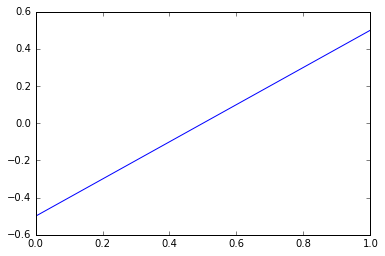

In [2]:
# Define the potential in the square well
def square_well_potential(x,V,a):
    """Potential for a particle in a square well, expecting two arrays: x, V(x), and potential height, a"""
    for i in range(x.size):
        V[i] = a*(x[i]-width/2.0)
    # Plot to ensure that we know what we're getting
    pl.plot(x,V)
    
# Declare space for this potential (diagonal_Potential) and call the routine
diagonal_Potential = np.linspace(0.0,width,num_x_points)
square_well_potential(x,diagonal_Potential,1.0)

Now we will build the matrix elements of the potential and the overall Hamiltonian.  Look carefully at the potential, and ask yourself if the form of the matrix makes sense: how does the symmetry affect the form ? What effect will this have on the energies of the perturbed system ? 

In [3]:
# Declare space for the matrix elements
H_matrix2 = np.eye(num_basis)

# Loop over basis functions phi_n (the bra in the matrix element)
print "Full Hamiltonian"
for n in range(num_basis):
    # Loop over basis functions phi_m (the ket in the matrix element)
    for m in range(num_basis):
        # Act with H on phi_m and store in H_phi_m
        H_phi_m = -0.5*second_derivative_functions_array[m] 
        add_potential_on_basis(H_phi_m,diagonal_Potential,basis_functions_array[m])
        # Create matrix element by integrating
        H_matrix2[m,n] = integrate_functions(basis_functions_array[n],H_phi_m,dx)
        # The comma at the end prints without a new line; the %8.3f formats the number
        print "%8.3f" % H_matrix2[m,n],
    # This print puts in a new line when we have finished looping over m
    print
    
print "Perturbation matrix elements:"
# Output the matrix elements of the potential to see how large the perturbation is
# Loop over basis functions phi_n (the bra in the matrix element)
for n in range(num_basis):
    # Loop over basis functions phi_m (the ket in the matrix element)
    for m in range(num_basis):
        # Act with H on phi_m and store in H_phi_m
        H_phi_m = np.zeros(num_x_points)
        add_potential_on_basis(H_phi_m,diagonal_Potential,basis_functions_array[m])
        # Create matrix element by integrating
        H_mn = integrate_functions(basis_functions_array[n],H_phi_m,dx)
        # The comma at the end prints without a new line; the %8.3f formats the number
        print "%8.3f" % H_mn,
    # This print puts in a new line when we have finished looping over m
    print
    


Full Hamiltonian
   4.935   -0.180   -0.000   -0.014    0.000   -0.004    0.000   -0.002    0.000   -0.001
  -0.180   19.739   -0.195   -0.000   -0.018    0.000   -0.006   -0.000   -0.002   -0.000
   0.000   -0.195   44.413   -0.199   -0.000   -0.020   -0.000   -0.006    0.000   -0.003
  -0.014   -0.000   -0.199   78.957   -0.200   -0.000   -0.021   -0.000   -0.007   -0.000
   0.000   -0.018   -0.000   -0.200  123.370   -0.201    0.000   -0.021   -0.000   -0.007
  -0.004   -0.000   -0.020   -0.000   -0.201  177.653   -0.201   -0.000   -0.022    0.000
   0.000   -0.006   -0.000   -0.021    0.000   -0.201  241.805   -0.202    0.000   -0.022
  -0.002   -0.000   -0.006   -0.000   -0.021   -0.000   -0.202  315.827   -0.202    0.000
   0.000   -0.002    0.000   -0.007   -0.000   -0.022    0.000   -0.202  399.719   -0.202
  -0.001    0.000   -0.003   -0.000   -0.007    0.000   -0.022    0.000   -0.202  493.480
Perturbation matrix elements:
   0.000   -0.180   -0.000   -0.014   -0.000   -0.004

Now we diagonalise, as usual.  Look at the eigenvalues: do you understand why they take these values ? Is this simple, first order perturbation expansion good enough for this problem ? 

In [4]:
# Solve using linalg module of numpy (which we've imported as la above)
eigenvalues, eigenvectors = la.eigh(H_matrix2)
# This call above does the entire solution for the eigenvalues and eigenvectors !
# Print results roughly, though apply precision of 4 to the printing
print
print "Eigenvalues and eigenvector coefficients printed roughly"
np.set_printoptions(precision=4)
print eigenvalues
print eigenvectors[0]
print eigenvectors[1]
print eigenvectors[2]
print

print "    Diag  Perf Square  Difference"
for i in range(num_basis):
    n = i+1
    print "%8.3f     %8.3f    %8.3f" % (eigenvalues[i],n*n*np.pi*np.pi/2.0,eigenvalues[i] - n*n*np.pi*np.pi/2.0)


Eigenvalues and eigenvector coefficients printed roughly
[   4.9326   19.7399   44.4136   78.9571  123.3702  177.653   241.8054
  315.8274  399.719   493.4807]
[  9.9993e-01   1.2165e-02  -3.3858e-05  -1.9471e-04  -6.9229e-07
   2.2987e-05  -6.0505e-08   5.2552e-06   1.0167e-08  -1.6928e-06]
[  1.2165e-02  -9.9989e-01   7.8840e-03   1.8058e-05   1.7738e-04
  -5.2925e-07   2.5236e-05  -5.7217e-08  -6.4761e-06   1.6305e-08]
[  6.0935e-05  -7.8838e-03  -9.9995e-01  -5.7465e-03  -1.0818e-05
   1.5022e-04  -3.8187e-07   2.3694e-05   4.6815e-08  -6.5389e-06]

    Diag  Perf Square  Difference
   4.933        4.935      -0.002
  19.740       19.739       0.001
  44.414       44.413       0.000
  78.957       78.957       0.000
 123.370      123.370       0.000
 177.653      177.653       0.000
 241.805      241.805       0.000
 315.827      315.827       0.000
 399.719      399.719       0.000
 493.481      493.480       0.000


When we plot the eigenstates, with a small potential it's hard to see the change relative to the unperturbed eigenstates, so we'll also plot the difference between perturbed and unperturbed eigenstates.  What do these differences look like ? 

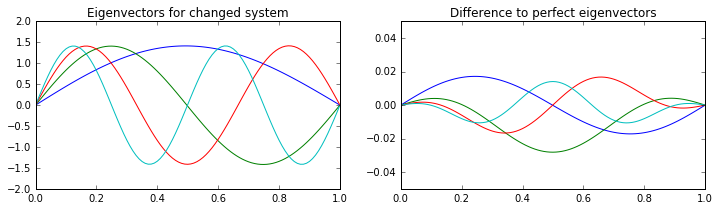

In [5]:
# Define a figure to take two plots
fig = pl.figure(figsize=[12,3])
# Add subplots: number in y, x, index number
ax = fig.add_subplot(121,autoscale_on=False,xlim=(0,1),ylim=(-2,2))
ax.set_title("Eigenvectors for changed system")
ax2 = fig.add_subplot(122,autoscale_on=False,xlim=(0,1),ylim=(-0.05,0.05))
ax2.set_title("Difference to perfect eigenvectors")
for m in range(4): # Plot the first four states
    psi = np.zeros(num_x_points)
    for i in range(num_basis):
        psi = psi+eigenvectors[i,m]*basis_functions_array[i]
    if eigenvectors[m,m] < 0:  # This is just to ensure that psi and the basis function have the same phase
        psi = -psi
    ax.plot(x,psi)
    psi = psi - basis_functions_array[m]
    ax2.plot(x,psi)

### Making the potential larger

We will now make the magnitude of the potential larger, so that we're no longer in the weak perturbation regime.  Look at the change to the diagonal of the Hamiltonian, and to the overall eigenvalues.  Are they consistent ? 

Full Hamiltonian
   4.935   -3.603   -0.000   -0.288    0.000   -0.079    0.000   -0.033    0.000   -0.017
  -3.603   19.739   -3.891   -0.000   -0.368    0.000   -0.112   -0.000   -0.049   -0.000
  -0.000   -3.891   44.413   -3.970   -0.000   -0.400   -0.000   -0.129    0.000   -0.059
  -0.288   -0.000   -3.970   78.957   -4.003   -0.000   -0.417   -0.000   -0.138   -0.000
  -0.000   -0.368   -0.000   -4.003  123.370   -4.019    0.000   -0.426   -0.000   -0.144
  -0.079   -0.000   -0.400   -0.000   -4.019  177.653   -4.029   -0.000   -0.432    0.000
   0.000   -0.112   -0.000   -0.417    0.000   -4.029  241.805   -4.035    0.000   -0.436
  -0.033    0.000   -0.129   -0.000   -0.426   -0.000   -4.035  315.827   -4.039    0.000
   0.000   -0.049    0.000   -0.138   -0.000   -0.432    0.000   -4.039  399.719   -4.042
  -0.017   -0.000   -0.059   -0.000   -0.144    0.000   -0.436    0.000   -4.042  493.480
Perturbation matrix elements:
   0.000   -3.603   -0.000   -0.288   -0.000   -0.079

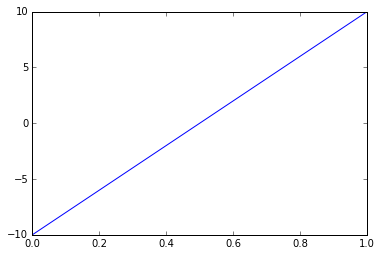

In [6]:
diagonal_Potential2 = np.linspace(0.0,width,num_x_points)
square_well_potential(x,diagonal_Potential2,20.0)
# Declare space for the matrix elements
H_matrix3 = np.eye(num_basis)

# Loop over basis functions phi_n (the bra in the matrix element)
print "Full Hamiltonian"
for n in range(num_basis):
    # Loop over basis functions phi_m (the ket in the matrix element)
    for m in range(num_basis):
        # Act with H on phi_m and store in H_phi_m
        H_phi_m = -0.5*second_derivative_functions_array[m] 
        add_potential_on_basis(H_phi_m,diagonal_Potential2,basis_functions_array[m])
        # Create matrix element by integrating
        H_matrix3[m,n] = integrate_functions(basis_functions_array[n],H_phi_m,dx)
        # The comma at the end prints without a new line; the %8.3f formats the number
        print "%8.3f" % H_matrix3[m,n],
    # This print puts in a new line when we have finished looping over m
    print
    
print "Perturbation matrix elements:"
# Output the matrix elements of the potential to see how large the perturbation is
# Loop over basis functions phi_n (the bra in the matrix element)
for n in range(num_basis):
    # Loop over basis functions phi_m (the ket in the matrix element)
    for m in range(num_basis):
        # Act with H on phi_m and store in H_phi_m
        H_phi_m = np.zeros(num_x_points)
        add_potential_on_basis(H_phi_m,diagonal_Potential2,basis_functions_array[m])
        # Create matrix element by integrating
        H_mn = integrate_functions(basis_functions_array[n],H_phi_m,dx)
        # The comma at the end prints without a new line; the %8.3f formats the number
        print "%8.3f" % H_mn,
    # This print puts in a new line when we have finished looping over m
    print

In [7]:
# Solve using linalg module of numpy (which we've imported as la above)
eigenvalues, eigenvectors = la.eigh(H_matrix3)
# This call above does the entire solution for the eigenvalues and eigenvectors !
# Print results roughly, though apply precision of 4 to the printing
print
print "Eigenvalues and eigenvector coefficients printed roughly"
np.set_printoptions(precision=4)
print eigenvalues
print eigenvectors[0]
print eigenvectors[1]
print eigenvectors[2]
print

print "    Diag  Perf Square  Difference"
for i in range(num_basis):
    n = i+1
    print "%8.3f     %8.3f    %8.3f" % (eigenvalues[i],n*n*np.pi*np.pi/2.0,eigenvalues[i] - n*n*np.pi*np.pi/2.0)


Eigenvalues and eigenvector coefficients printed roughly
[   4.0834   19.9755   44.5683   79.0523  123.4335  177.6979  241.8388
  315.8539  399.7402  493.6551]
[  9.7302e-01   2.3030e-01  -1.3321e-02  -4.2000e-03   2.8058e-04
   4.6696e-04  -2.4300e-05   1.0562e-04  -4.0734e-06   3.3954e-05]
[  2.2955e-01  -9.6072e-01   1.5575e-01   7.1874e-03  -3.6951e-03
  -2.1336e-04   5.0959e-04  -2.2948e-05   1.2990e-04  -6.5208e-06]
[  2.2642e-02  -1.5451e-01  -9.8109e-01  -1.1424e-01   4.3154e-03
   3.0819e-03  -1.5354e-04   4.7700e-04  -1.8763e-05   1.3122e-04]

    Diag  Perf Square  Difference
   4.083        4.935      -0.851
  19.976       19.739       0.236
  44.568       44.413       0.155
  79.052       78.957       0.095
 123.434      123.370       0.063
 177.698      177.653       0.045
 241.839      241.805       0.033
 315.854      315.827       0.027
 399.740      399.719       0.021
 493.655      493.480       0.175


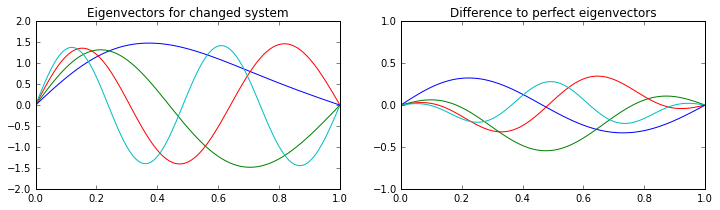

In [8]:
# Define a figure to take two plots
fig = pl.figure(figsize=[12,3])
# Add subplots: number in y, x, index number
ax = fig.add_subplot(121,autoscale_on=False,xlim=(0,1),ylim=(-2,2))
ax.set_title("Eigenvectors for changed system")
ax2 = fig.add_subplot(122,autoscale_on=False,xlim=(0,1),ylim=(-1,1))
ax2.set_title("Difference to perfect eigenvectors")
for m in range(4): # Plot the first four states
    psi = np.zeros(num_x_points)
    for i in range(num_basis):
        psi = psi+eigenvectors[i,m]*basis_functions_array[i]
    if eigenvectors[m,m] < 0:  # This is just to ensure that psi and the basis function have the same phase
        psi = -psi
    ax.plot(x,psi)
    psi = psi - basis_functions_array[m]
    ax2.plot(x,psi)

So for this problem first order perturbation theory is not good enough.  We could use higher order perturbation theory here, or a different approach.  We will return to this problem in a notebook on the variational theorem.